<a href="https://colab.research.google.com/github/Ramzy70/FreeCodeCamp-MachineLearning-Course/blob/main/tensorFlow/6_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the course that contains definitions is here: https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


 we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 1s 0us/step


In [31]:
train_images.shape
train_images[0,23,23]

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).
Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [4]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

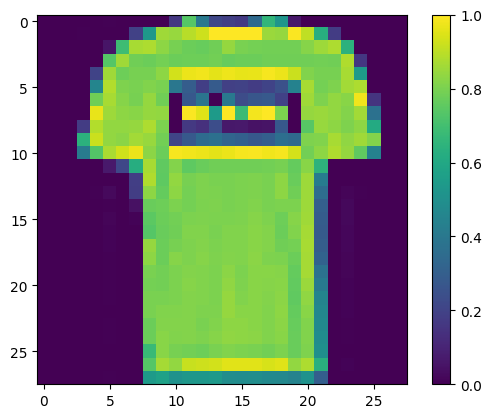

In [26]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing
we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1.
We do this because smaller values will make it easier for the model to process our values.


In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Building the Model

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1) it turn a [28,28] matrix to [1,784]
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)  It has 128 neurons and uses the rectify linear unit activation function.
    keras.layers.Dense(10, activation='softmax') # output layer (3) 10 for 10 classes to predict for, The activation function softmax is used to calculate a probabillity distribution for each class. This means the value of any neuron will be between 0 and 1, where 1 represents a high probabillity of the image being that class.
])

Compile the Model

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the Model

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1974 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1916 - accuracy: 0.9284
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1889 - accuracy: 0.9293
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1840 - accuracy: 0.9315
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1791 - accuracy: 0.9329
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1763 - accuracy: 0.9327
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1704 - accuracy: 0.9363
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1670 - accuracy: 0.9373
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1647 - accuracy: 0.9374
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.15

Evaluating the Model

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)
# the accuracy here is lower than when training the model. This difference is reffered to as overfitting.

313/313 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8763
Test accuracy: 0.8762999773025513


Making Predictions

In [32]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


9

In [33]:
# This method returns to us an array of predictions for each image we passed it.
predictions[0] # the predictions for image 1.
np.argmax(predictions[0]) # to get the value with the highest score

9

 a small function here to help us verify predictions

Pick a number: 555
1/1 [==============================] - 0s 20ms/step


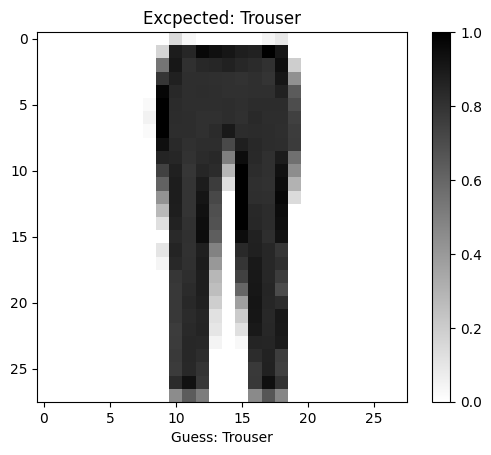

In [38]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)